Importación

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

from sklearn import (manifold, preprocessing, decomposition)
import time

## PUNTO 1 - Exploración de la base

Cargamos los datos bajados de la database de Kaggle correspondientes al FIFA 2021 como 'data.csv'.

In [3]:
#df=pd.read_excel("Career Mode player datasets - FIFA 15-21.xlsx")
df=pd.read_csv('https://raw.githubusercontent.com/melinaLuque/DiploDatos2021_AyV/main/players_21.csv')
df.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,...,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,...,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3


In [4]:
# Visualizamos las últimas 4 filas del datafram
df.tail(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,35000,1000,CB,Right,1,2,2,Low/Low,Normal,No,57000.0,NaN,SUB,25.0,NaN,2020-08-01,2020.0,NaN,NaN,58.0,23.0,26.0,27.0,50.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,16,45,31,...,60,56,45,48,70,35,65,55,45,23,44,50,25,25,35,40,NaN,56,47,12,13,8,14,6,32+2,32+2,32+2,30+0,30+0,30+0,30+0,30+0,29+2,29+2,29+2,31+2,32+2,32+2,32+2,31+2,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,35000,1000,CB,Right,1,2,2,Low/Medium,Normal,No,57000.0,NaN,RES,2.0,NaN,2019-02-01,2022.0,NaN,NaN,51.0,25.0,29.0,36.0,45.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,46,40,...,54,49,40,45,57,35,69,58,55,22,46,45,25,25,35,40,NaN,55,45,12,9,14,15,13,34+2,34+2,34+2,33+0,33+0,33+0,33+0,33+0,33+2,33+2,33+2,35+2,35+2,35+2,35+2,35+2,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,65000.0,NaN,RDM,4.0,NaN,2020-08-01,2023.0,NaN,NaN,61.0,35.0,48.0,48.0,44.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,32,45,56,...,62,60,59,51,53,45,56,48,63,33,56,40,31,45,42,43,NaN,49,45,15,7,7,5,13,44+2,44+2,44+2,46+0,45+0,45+0,45+0,46+0,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18943,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,Yue Song,28,1991-11-20,185,79,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,47,30000,2000,CM,Right,1,2,2,Low/Low,Lean,No,47000.0,NaN,RES,33.0,NaN,2020-08-01,2022.0,NaN,NaN,65.0,37.0,49.0,46.0,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,32,44,56,...,67,64,56,44,55,49,59,54,62,34,57,35,48,44,36,35,NaN,43,45,8,5,11,5,7,46+1,46+1,46+1,47+0,46+0,46+0,46+0,47+0,47+0,47+0,47+0,49+,47+0,47+0,47+0,49+,47+0,47+0,47+0,47+0,47+0,47+0,46+1,46+1,46+1,47+0


In [5]:
print("Lista de columnas:", list(df.columns))
print("Cantidad de columnas:", len(df.columns))
print("Cantidad de filas del dataframe:", len(df))

Lista de columnas: ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_react

### Análisis del "Overall" (Desempeño global)

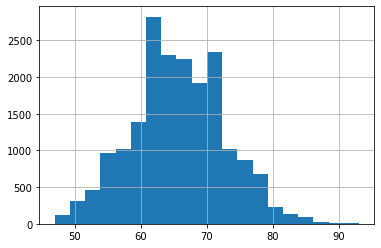

In [6]:
df['overall'].hist(bins = 20)

#### Agrupar por posición

In [7]:
df.team_position.value_counts()

SUB    8065
RES    3163
LCB     681
RCB     681
GK      681
LB      553
RB      553
ST      452
LCM     425
RCM     425
LM      420
RM      420
CAM     286
LDM     248
RDM     248
LS      224
RS      224
CDM     181
LW      170
RW      170
CB      128
LWB      78
RWB      78
CM       76
LAM      25
RAM      25
RF       13
LF       13
CF       13
Name: team_position, dtype: int64

Creamos una nueva columna para delanteros, defensores, mediocampistas y arqueros

In [8]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [9]:
df["Position2"]=df["team_position"].apply(lambda x: pos2(x))

In [10]:
# Filtramos por los que NO son NAN y tienen una posición asignada
df = df[df['Position2'] != 'nan']
df.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position2
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,...,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,Midfielder
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,...,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,Forward
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,...,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,GK
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,...,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,Forward
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,1665000

In [11]:
# Contabilizamos la cantidad de defensores, delanteros, mediocampistas y arqueros
df["Position2"].value_counts()

Defender      2752
Forward       2106
Midfielder    1952
GK             681
Name: Position2, dtype: int64

#### Agrupamiento por posición y overall

In [12]:
# Mejor Midfielder, mejor forward, mejor GK y mejor defender (Según el mayor overall)
best_players_per_position= df.iloc[df.groupby(df['Position2'])['overall'].idxmax()][['Position2','short_name','overall']].sort_values("overall",ascending=False)
best_players_per_position


,Position2,short_name,overall
0,Midfielder,L. Messi,93
1,Forward,Cristiano Ronaldo,92
2,GK,J. Oblak,91
8,Defender,V. van Dijk,90


In [13]:
club_nation_position_count = df.groupby(['Position2'])['overall'].describe()[['count', 'mean']]
club_nation_position_count

,count,mean
Position2,,
Defender,2752.0,68.407340
Forward,2106.0,69.123932
GK,681.0,70.014684
Midfielder,1952.0,68.978996


#### Agrupamiento por nacionalidad y overall

In [14]:
group_by_team_position = pd.DataFrame(df.team_position.value_counts().sort_index())

In [15]:
nationality_avg_overall=df.groupby("nationality")["overall"].mean().reset_index().sort_values("overall",ascending=False)
nationality_avg_overall.head(8)

,nationality,overall
41,Egypt,77.666667
125,Togo,75.800000
25,Central African Republic,74.500000
130,Ukraine,73.869565
68,Italy,73.598592
50,Gabon,73.500000
18,Brazil,73.124454
7,Armenia,73.000000


#### Agrupamiento por club y overall

In [16]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club_name,overall
374,Liverpool,87.454545
489,Real Madrid,86.636364
386,Manchester City,85.818182
214,FC Barcelona,85.363636
216,FC Bayern München,85.090909
451,Paris Saint-Germain,84.181818
64,Atlético Madrid,83.727273
330,Inter,83.636364


#### Agrupamiento por valor en euros y overall

In [17]:
value_eur_avg_overall=df.groupby("value_eur")["overall"].mean().reset_index().sort_values("overall",ascending=False)
value_eur_avg_overall.head(185)

,value_eur,overall
198,67500000,93.000000
174,46000000,92.000000
202,75000000,91.000000
207,90000000,91.000000
206,87000000,91.000000
205,80000000,91.000000
195,62500000,90.000000
208,105500000,90.000000
203,75500000,90.000000
204,78000000,90.000000


De acuerdo al análisis preliminar determinamos que:
1. Los jugadores con mayor overall (60 hacia arriba) tienen un valor en euros entre 250000 y 105500000

2. Los clubes que tienen jugadores con mejor desempeño global son:
* Bayern München	81.045455
* Real Madrid	79.250000
* Chelsea	79.212121
* FC Barcelona	78.909091
* Liverpool	78.575758
* Inter	78.000000
* Manchester United	77.818182
* Manchester City	77.484848

3. Las nacionalidades que tienen jugadores con mejor desempeño global son:
* Tanzania	76.000000
* Chad	73.000000
* Mozambique	72.200000
* Bermuda	72.000000
* Armenia	71.500000
* Libya	71.250000

4. Agrupando por posiciones:
* Defender      2752
* Forward       2106
* Midfielder    1952
* GK             681
Eliminamos los jugadores cuya posición es NaN para evitar confusiones y utilizar los datos de los jugadores cuya posición esta asignada.

### Preparación de los datos

#### Filtrado de datos

In [18]:
# Filtramos por jugadores con overall mayor a 60 y que no sean arqueros. 
df_n=df
df_n=df_n[((df_n['overall'] > 60) & (df_n['Position2'] != 'GK'))]

# Se definen las siguientes variables como skills_ratings
skills_ratings = ['value_eur', 'wage_eur', 'international_reputation', 
                   'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number', 
                   'pace', 'shooting', 'passing', 'dribbling',
                   'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 
                   'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
                   'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
                   'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
                   'movement_agility', 'movement_reactions', 'movement_balance', 
                   'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 
                   'power_long_shots', 'defending_standing_tackle', 'defending_sliding_tackle',
                   'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                   'goalkeeping_positioning', 'goalkeeping_reflexes']

# Imprimimos la cantidad de variables seleccionadas                 
print("Cantidad de variables seleccionadas:", len(skills_ratings))

Cantidad de variables seleccionadas: 40


#### Jugador perfecto

In [19]:
MachineGunDict={'Name':'MachineGun','Overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

#### Base con las skills seleccionadas

In [20]:
# A continuación se forma un nuevo dataframe con las skills seleccionadas y los jugadores cuyo overall es mayor al 60
df_skills=df_n[skills_ratings] 

# Se muestran las primeras 5 filas del dataframe nuevo
df_skills.head()

,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,67500000,560000,5,4,4,138400000.0,10.0,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,35,24,6,11,15,14,8
1,46000000,220000,5,4,5,75900000.0,7.0,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,32,24,7,11,15,14,11
2,80000000,240000,4,4,4,132000000.0,9.0,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,42,19,15,6,12,8,10
3,90000000,270000,5,5,5,166500000.0,10.0,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,30,29,9,9,15,15,11
4,87000000,370000,4,5,4,161000000.0,17.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,65,53,15,13,5,10,13


In [21]:
print("Cantidad de filas en el nuevo dataframe:", len(df_skills))

Cantidad de filas en el nuevo dataframe: 6361


## PUNTO 2 - Evaluación visual e intuitiva de a dos variables por vez.

### Visualización de datos según dos características

#### Skills de defensa: defending & defending_sliding_tackle

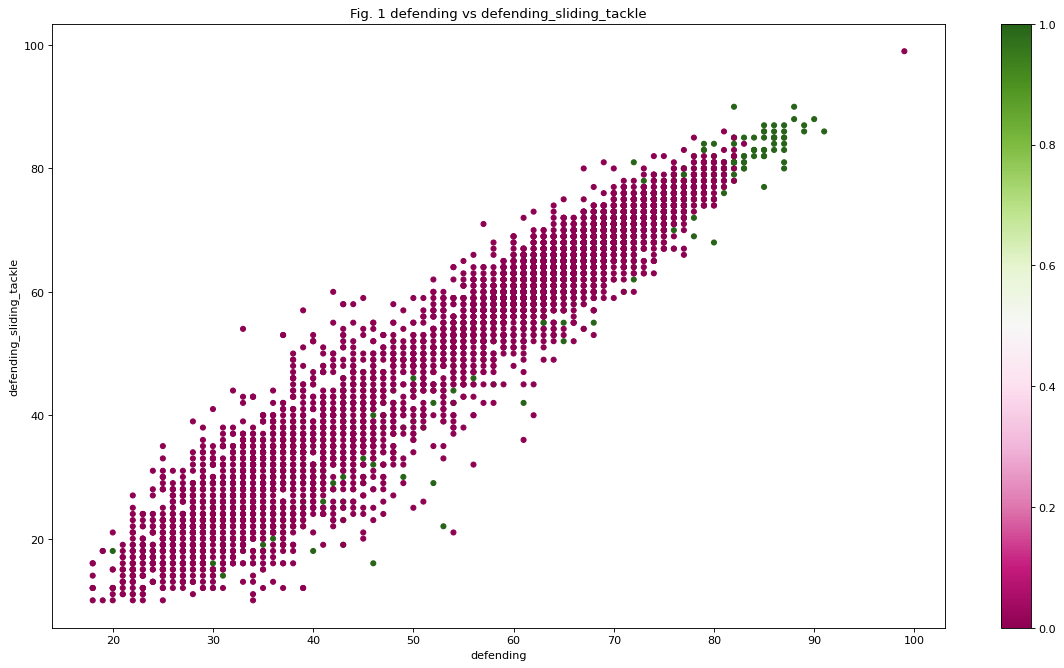

In [22]:
#data=[]
#Diferenciamos a los mejores jugadores cuyo overall es mayor a 80
bool_crack=df_n["overall"] > 80 

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[11]
skill_2=skills_ratings[34]

plt.figure(figsize=(18,10), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=20,c=bool_crack,cmap='PiYG')
plt.colorbar()
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title('Fig. 1 ' + skill_1 + ' vs ' + skill_2)
plt.show()

Al seleccionar dos variables que corresponden principalmente a la posicion de defensa, se obtiene un gráfico como el anterior donde se observa una relacion lineal entre ambas variables. De este modo, podemos esperar ver a los jugadores defensores, en este caso, en el extremo superior y al resto de los jugadores distribuidos más abajo. 

#### Skills mixtas: dribling y defending_standing_tackle

In [23]:
#data=[]
#Diferenciamos a los mejores jugadores cuyo overall es mayor a 80
bool_crack=df_n["overall"] > 80 

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_3=skills_ratings[10]
skill_4=skills_ratings[33]

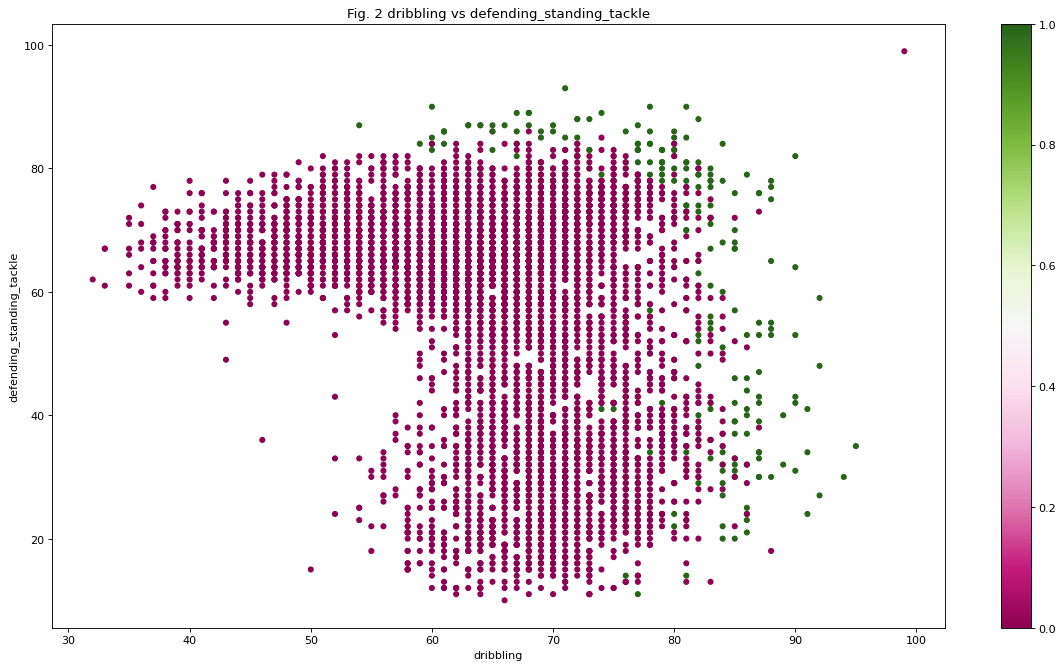

In [24]:
plt.figure(figsize=(18,10), dpi=80)
plt.scatter(df_skills[skill_3], y=df_skills[skill_4],s=20,c=bool_crack,cmap='PiYG')
plt.xlabel(skill_3)
plt.ylabel(skill_4)
plt.colorbar()
plt.title('Fig. 2 ' + skill_3 + ' vs ' + skill_4)
plt.show()

Al seleccionar las variables dribling y defending_standing_tackle se pueden distinguir dos grupos en los gráficos siguientes vamos a analizar de que tipo de jugadores podría tratarse cada uno

Sin embargo, no se observa una separacion evidente en grupos de jugadores. Intentamos entonces probar con otras variables. Para ello, se graficaron todas las habilidades todas contra todas. En ningun caso, se obtuvo una separacion evidente. 

Con la misma intencion que en la Fig. 1, se graficaron ahora dos variables de ataque. 

#### Skills de ataque: dribling & passing 

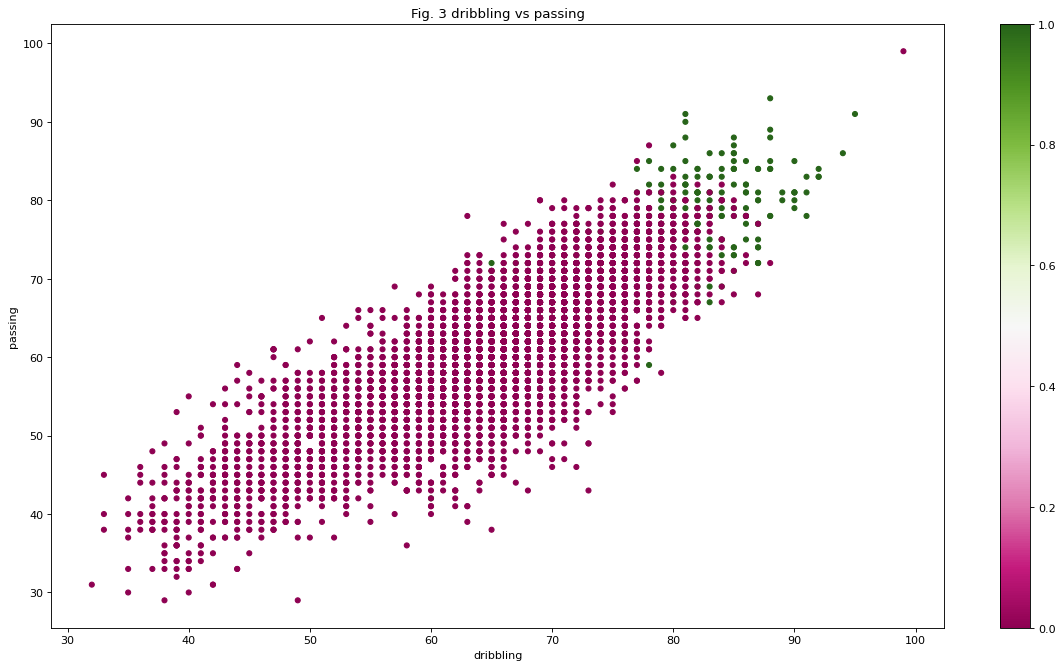

In [25]:
#data=[]
#Diferenciamos a los mejores jugadores cuyo overall es mayor a 80
bool_crack=df_n["overall"] > 80 


# for i in range(7,35,1):
#   for j in range(7,35,1):
#     if i==j:
#       print('nada')
#     else:
skill_5=skills_ratings[10]
skill_6=skills_ratings[9]

plt.figure(figsize=(18,10), dpi=80)
plt.scatter(df_skills[skill_5], y=df_skills[skill_6],s=20,c=bool_crack,cmap='PiYG')
plt.xlabel(skill_5)
plt.ylabel(skill_6)
plt.title('Fig. 3 ' + skill_5 + ' vs ' + skill_6)
plt.colorbar()
plt.show()

Y se obtuvo nuevamente, la relacion lineal esperada entre las variables. En este caso, esperamos ver a los jugadores atacantes en el extremo superior derecho. 

### Visualización de datos según dos características con jugadores

#### Skills de defensa: defending & defending_sliding_tackle

In [26]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title='Fig. 4 Visualización de la base de a dos variables numéricas ( '+ skill_1 + ' vs ' + skill_2 + ')', titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1200,height=900)

fig = go.Figure(data=data, layout=layout)

In [27]:
fig.show(renderer="colab")

La grafica muestra la distribucion de jugadores con respecto a las habilidades de defending (defensa, en el eje horizontal) y de defending_sliding_tackle (tacle defensor, en el eje vertical). 

Se observa una gran concentracion de jugadores en el extremo superior derecho. Entre ellos, se destacan defensores como Van Dijk, Chiellini, Sergio Ramos, Marquinhos, Piqué, Hummels, Gabriel Paulista. Tambien se observan centrocampistas como Casimiro o Fabinho. 


Más hacia el centro de la distribucion, se observan jugadores centrocampistas o delanteros, como Di Maria o Griezmann. Y los delanteros "cracks" como Neymar, Messi o Cristiano Ronaldo se encuentran en el extremo inferior izquierdo de esta distribucion. 

Si bien, no hay una separación evidente, la distribucion de los jugadores respecto de sus posiciones es clara en esta figura. 

#### Skills mixtas: dribling y defending_standing_tackle

In [28]:
graf1 = go.Scatter(x=df_skills[skill_3], y=df_skills[skill_4],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_3], y=df_skills.loc[bool_crack,skill_4],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title='Fig. 5 Visualización de la base de a dos variables numéricas ( '+ skill_3 + ' vs ' + skill_4 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_3),
                yaxis=dict(title=skill_4),
                autosize=False, width=1200,height=900)

fig = go.Figure(data=data, layout=layout)

In [29]:
fig.show(renderer="colab")

La imagen nos muestra la distribucion de los jugares en funcion de las habilidades de dribbling (o amague) y de defending standing tackle (o tacle de defensa). De la imagen anterior, observamos por un lado que la mayoria de los jugadores tienen grandes habilidades de dribbling (o amague). Se destacan principalmente, delanteros (como Messi, Neymar, Dybala) y mediocampistas (como Bernardo Silva o Verrati). Los menos habiles, son los defensores tales como Chiellini, van Dijk o Piqué. 

Por otro lado, vemos que defensores y mediocampistas son mas habilidosos en esta tecnica de defensa que los delanteros. Es por eso, que vemos a los mas destacados delanteros ubicados en el margen derecho inferior de la distribucion.  


Sin embargo, hay mayor mezcla de jugadores en esta figura que en la figura anterior. No es clara la separación por posiciones en este caso. 

#### Skills de ataque: dribling & passing

In [30]:
graf1 = go.Scatter(x=df_skills[skill_5], y=df_skills[skill_6],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_5], y=df_skills.loc[bool_crack,skill_6],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title='Fig. 6 Visualización de la base de a dos variables numéricas ( '+ skill_5 + ' vs ' + skill_6 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_5),
                yaxis=dict(title=skill_6),
                autosize=False, width=1200,height=900)

fig = go.Figure(data=data, layout=layout)

In [31]:
fig.show(renderer="colab")

En esta figura, se observa una tendencia similar a la de la Fig. 4. Sin embargo, vemos una mayor concentracion de nombres en el extremo superior derecho que en el caso de la Fig. 4. 

Se destacan los nombres de Messi, Dybala o Neymar como muy habilidosos. Pero también se encuentran nombres como el de Eriksen, quien es centrocampista, en el cúmulo del extremo. 

Más hacia el centro de la distribución, se encuentran defensores como Chiellino, van Dijk, Piqué o Gabriel Paulista. 

En resumen, estas habilidades parecen compartise por delanteros y centrocampistas. Y no son tan habilidosos en esto los defensores. 

## PUNTO 3- k-Medias y Mean Shift

Probaremos tecnicas de clustering mas complejas tales como K-means y Mean Shift. 

### Clustering-con-Kmeans

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. 

#### Cantidad de grupos/clusters (n_clusters)

In [32]:
# Número de clusters buscado
n_clusters = 5

km = KMeans(n_clusters=n_clusters)

# Eliminamos las filas cuyos valores son Nan
df_skills = df_skills.dropna()

km.fit(df_skills) #utiliza todas las habilidades: 40 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  1.0627444737748595e+17


#### Elección de la cantidad de grupos/clusters

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

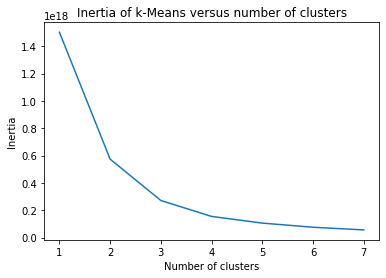

In [33]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 1 a 8 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(1,8)]

plt.plot(np.arange(1, 8), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

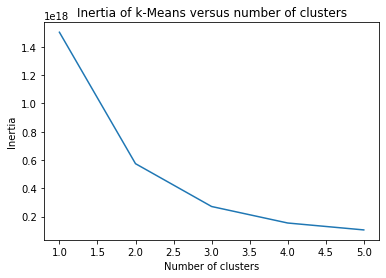

In [34]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 1 a 6 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(1,6)]

plt.plot(np.arange(1, 6), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

#### Gráfico de agrupamiento

In [35]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]< 86

#Eligo dos números entre 0 y  de n_skills-1
#skill_1=skills_ratings[11]
#skill_2=skills_ratings[31]

In [36]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Cracks!!',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title='Fig. 7 Clustering K means ( '+ skill_1 + ' vs ' + skill_2 + ')' ,titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [37]:
clusters[8]

2

In [38]:
#En Colab:
fig.show(renderer="colab")

In [39]:
((df_skills[skill_1]==38) & (df_skills[skill_2]==24)).value_counts()

False    6104
True        5
dtype: int64

Se distinguen 5 colores. El azul, parece ser el dominante y parece incluir a delanteros y centrocampistas. El resto de los colores parecen incluir a los defensores. Por ejemplo, Eriksen (53,22) tiene asignado el color celeste mientras que van Dijk (91,86) tiene asignado el color naranja. 

In [40]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]< 86

#Eligo dos números entre 0 y  de n_skills-1
#skill_3=skills_ratings[10]
#skill_4=skills_ratings[33]

In [41]:
kmean_clusters = go.Scatter(x=df_skills[skill_3], y=df_skills[skill_4],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_3], y=df_skills.loc[bool_crack,skill_4],name='Cracks!!',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title='Fig. 8 Clustering K means ( '+ skill_3 + ' vs ' + skill_4 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_3),
                yaxis=dict(title=skill_4),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [42]:
clusters[8]

2

In [43]:
#En Colab:
fig.show(renderer="colab")

Acá observamos nuevamente, los 5 clusters distinguidos por colores. Las habilidades de dribbling parecen ser destacadas en mediocampitas en defensores. Por otro lado, la habilidad defending_standing_tackle parece ser variable para todas las posiciones de los jugadores. 

No se observan clusters claramente. 

In [44]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]< 86

#Eligo dos números entre 0 y  de n_skills-1
#skill_5=skills_ratings[13]
#skill_6=skills_ratings[34]

In [45]:
kmean_clusters = go.Scatter(x=df_skills[skill_5], y=df_skills[skill_6],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_5], y=df_skills.loc[bool_crack,skill_6],name='Cracks!!',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title='Fig. 9 Clustering K means ( '+ skill_5 + ' vs ' + skill_6 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_5),
                yaxis=dict(title=skill_6),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [46]:
#En Colab:
fig.show(renderer="colab")

Segun la Fig. 6, en el extremo superior derecho, se concentraban los mediocamistas y delanteros por lo que esperariamos una distribucion de colores opuesta a la que estamos observando.

Puede ser que el clustering por el metodo k-means no sea capaz de distinguir las posiciones de los jugadores solo a partir de sus skills. De hecho, si analizamos el cluster al que pertenece Messi (delantero) y el cluster al que pertenece van Dijk (defensor), vemos lo siguiente:



In [47]:
print('Cluster al que pertenece ' +df['short_name'][0] +': ', clusters[0])
print('Cluster al que pertenece ' +df['short_name'][8] +': ', clusters[8])

Cluster al que pertenece L. Messi:  2
Cluster al que pertenece V. van Dijk:  2


Ambos pertenecen al mismo cluster. 

Luego, el metodo k-means no distingue optimamente las posiciones de los jugadores. 

In [48]:
df_clusters=df_skills.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


### Clustering-Mean-Shift

A diferencia de k-means, mean shift no requiere de la determinacion preliminar de la cantidad de clusters. 

#### Clusters

In [49]:
ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 6109


El metodo encontró 6109 clusters. 

#### Gráfico de resultados

In [50]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86



In [51]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title='Fig. 10 Mean Shift ( '+ skill_1 + ' vs ' + skill_2 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

#En Colab
fig.show(renderer="colab")

In [52]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_3], y=df_skills[skill_4],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_3], y=df_skills.loc[bool_crack,skill_4],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title='Fig. 11 Mean Shift ( '+ skill_3 + ' vs ' + skill_4 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_3),
                yaxis=dict(title=skill_4),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab
fig.show(renderer="colab")

In [53]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_5], y=df_skills[skill_6],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_5], y=df_skills.loc[bool_crack,skill_6],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title='Fig. 12 Mean Shift ( '+ skill_5 + ' vs ' + skill_6 + ')',titlefont=dict(size=20),
                xaxis=dict(title=skill_5),
                yaxis=dict(title=skill_6),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab
fig.show(renderer="colab")

In [54]:
clusters2[0]

11

In [55]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  6109 clusters, según los hiperparámetros elegidos


Mean Shift encontró 6109 clusters, lo cual nos parece demasiado. De igual manera, el agrupamiento por Mean Shift encontró diferencias que k-means no. La Fig. 10 parece encontrar diferencias entre la derecha y la izquierda de la figura, destacando un grupo bien marcado a la izquierda (en tonos azules) para valores de defending mayores de 70, un grupo bien marcado en el centro (en color rojo), que podriamos pensar son los mediocampistas y un sector más de mezcla que corresponderia a los delanteros. Sin embargo, esta segmentacion no se reproduce en las Figs. 11 y 12 donde ahora los puntos en tonos azules no parecen estar representando a los defensores. 


Si analizamos los clusters en los que están incluidos Messi y van Dijk por ejemplo, vemos que: 

In [56]:
print('Cluster al que pertenece ' +df['short_name'][0] +': ', clusters2[0])
print('Cluster al que pertenece ' +df['short_name'][8] +': ', clusters2[8])

Cluster al que pertenece L. Messi:  11
Cluster al que pertenece V. van Dijk:  5


Vemos que se les asignan distintos clusters, lo cual es correcto. Sin embargo, siendo que el método encuentra mas de 6000 clusters, la mayoria de los jugadores van a encontrarse en clusters distintos sin necesariamente estar separados por posición.

Finalmente, este metodo no parece estar segmentando de manera correcta a los jugadores. 

## PUNTO 5 - Embeddings y técnicas de clustering

Análisis de NAN

In [57]:
# Columnas que poseen datos con NaN
# release_clause_eur, pace, shooting , 'pace', 'shooting', 'passing', 'dribbling','defending', 'physic', 
# Por el momento las vamos a sacar luego tendríamos que normalizar para evitar eliminar estas columnas

### Normalización

Vamos a normalizar las siguientes columnas:

* release_clause_eur
* pace
* shooting 
* passing
* dribbling
* defending
* physic

In [58]:
# Se crea una copia del dataframe
df_copy= df.copy(deep=True)

# Se asigna 0 en todas las columnas donde hay NaN
df_copy['release_clause_eur'] = np.where(df_copy['release_clause_eur'].isna(),0,df_copy['release_clause_eur'])
df_copy['pace'] = np.where(df_copy['pace'].isna(),0,df_copy['pace'])
df_copy['shooting'] = np.where(df_copy['shooting'].isna(),0,df_copy['shooting'])
df_copy['passing'] = np.where(df_copy['passing'].isna(),0,df_copy['passing'])
df_copy['dribbling'] = np.where(df_copy['dribbling'].isna(),0,df_copy['dribbling'])
df_copy['defending'] = np.where(df_copy['defending'].isna(),0,df_copy['defending'])
df_copy['physic'] = np.where(df_copy['physic'].isna(),0,df_copy['physic'])

In [59]:
# Se aplica normalizacion para las columnas mencionadas
# release_clause_eur
release_clause_eur_copy = df_copy.release_clause_eur.values.copy().reshape(-1,1)
release_clause_eur_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(release_clause_eur_copy)
# pace
pace_copy = df_copy.pace.values.copy().reshape(-1,1)
pace_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(pace_copy)
# shooting
shooting_copy = df_copy.shooting.values.copy().reshape(-1,1)
shooting_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(shooting_copy)
# passing
passing_copy = df_copy.passing.values.copy().reshape(-1,1)
passing_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(passing_copy)
# dribbling
dribbling_copy = df_copy.dribbling.values.copy().reshape(-1,1)
dribbling_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(dribbling_copy)
# defending
defending_copy = df_copy.defending.values.copy().reshape(-1,1)
defending_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(defending_copy)
# physic
physic_copy = df_copy.physic.values.copy().reshape(-1,1)
physic_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(physic_copy)

In [60]:
# Se asignan los valores a las columnas
df_copy_normalice = df_copy.copy(deep=True)
df_copy_normalice['release_clause_eur'] = release_clause_eur_copy_standard
df_copy_normalice['pace'] = pace_copy_standard
df_copy_normalice['shooting'] = shooting_copy_standard
df_copy_normalice['passing'] = passing_copy_standard
df_copy_normalice['dribbling'] = dribbling_copy_standard
df_copy_normalice['defending'] = defending_copy_standard
df_copy_normalice['physic'] = physic_copy_standard

# Nuevo dataframe con las columnas normalizadas
df_copy_normalice

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position2
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,1.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,...,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,Midfielder
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,1.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,...,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,Forward
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,1.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,...,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,GK
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,1.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,...,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,Forward
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,1.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",

In [61]:
n_sne=3000 
df_sne=df_copy_normalice.loc[:n_sne]

# Sacamos los arqueros
df_sne=df_sne[df_sne['Position2'] != 'GK']

skills_ratings = [ 'weak_foot', 'skill_moves', 'attacking_crossing', 'attacking_finishing', 
                   'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
                   'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
                   'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
                   'movement_agility', 'movement_reactions', 'movement_balance', 
                   'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 
                   'power_long_shots', 'defending_standing_tackle', 'defending_sliding_tackle',
                   'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                   'goalkeeping_positioning', 'goalkeeping_reflexes']
X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  29


In [62]:
X.head(5)
len(X)

1664

### Transformación del espacio a 2 dimensiones

Transformamos el espacio de dim 40 en un espacio de dimensión 2 (n_components=2)

In [63]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1664 samples in 0.008s...
[t-SNE] Computed neighbors for 1664 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1664
[t-SNE] Computed conditional probabilities for sample 1664 / 1664
[t-SNE] Mean sigma: 12.732590
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.721062
[t-SNE] KL divergence after 1000 iterations: 1.327282
t-SNE done! Time elapsed: 15.285727977752686 seconds


In [64]:
print("Cantidad X_tsne: ", len(X_tsne))
X_tsne[0:10] #Diez jugadores

Cantidad X_tsne:  1664


array([[-12.130482 , -34.539986 ],
       [-16.633072 , -37.22186  ],
       [-17.86267  , -37.615105 ],
       [-11.577492 , -34.988842 ],
       [ 21.727962 , -14.467078 ],
       [-14.429391 , -37.336113 ],
       [ 13.172312 ,  34.96373  ],
       [-14.8576565, -37.12544  ],
       [-12.8583555, -36.9363   ],
       [ 25.084234 ,   3.21526  ]], dtype=float32)

### Gráfico

In [65]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores
print(len(bool_crack))
#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'Position2'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Fig. 14. Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#plot(fig)


1664


In [66]:
#En Colab
fig.show(renderer="colab")

In [67]:
bool_striker= df_sne["Position2"] == 'Forward'
bool_midfielder= df_sne["Position2"] == 'Midfielder'
bool_defender= df_sne["Position2"] == 'Defender'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=750)

fig = go.Figure(data=data, layout=layout)

In [68]:
#En Colab
fig.show(renderer="colab")

### Interpretación

Amarillo los defensores
* Koulibaly --> Defensor
* Varane --> Defensor
* Chiellini --> Defensor
* Ricardo Costa --> Defensor

Rojo los mediocampistas
* Noble
* Ramsey
* Fabinho
* Rongier

Celeste los delanteros
* Urzi
* Brekalo
* Jovane Cabral
* N. Pepe



t-SNE permite visualizar, de una manera bastante acertada, la distribucion de jugadores segun sus posiciones llevando el espacio total a un espacio de dos componentes. 

## PUNTO 6 - Evaluación

En conclusion, los metodos de clustering k-means y mean shift no funcionan muy bien con este dataset. t-SNE logra una separación correcta de las posiciones de los jugadores. 

## PUNTO 7 - Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?

Se realizó una normalización de la base ya que las siguientes columnas poseian datos en NaN
Columnas que poseen datos con NaN
* release_clause_eur
* pace
* shooting 
* passing
* dribbling
* defending
* physic

Al tener columnas con filas con valores en NaN no se podía aplicar PCA 